## Numpy


[Creating arrays](#carr)

[Creating Arrays with Ones, Zeros and Empty](#caro)

[Copying arrays](#cop)

[Structured arrays](#sa)

[Identical arrays](#ia)

[Numerical operation on numpy arrays](#non)

[Broadcasting](#bd)

The advantages of Core Python:

high-level number objects: integers, floating point
containers: lists with cheap insertion and append methods, dictionaries with fast lookup
Advantages of using Numpy with Python:

array oriented computing
efficiently implemented multi-dimensional arrays
designed for scientific computation

In [1]:
import numpy as np
cvalues = [20.1, 20.8, 21.9, 22.5, 22.7, 22.3, 21.8, 21.2, 20.9, 20.1]

C = np.array(cvalues)
print(C)

[20.1 20.8 21.9 22.5 22.7 22.3 21.8 21.2 20.9 20.1]


In [2]:
## Python way

fvalues = [ x*9/5 + 32 for x in cvalues] 
print(fvalues)

[68.18, 69.44, 71.42, 72.5, 72.86, 72.14, 71.24000000000001, 70.16, 69.62, 68.18]


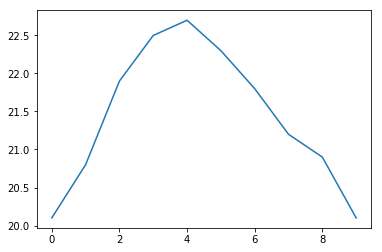

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(C)
plt.show()

The main benefits of using numpy arrays should be smaller memory consumption and better runtime behaviour

In [5]:
# We will create the numpy array of the previous diagram and calculate the memory usage:
from sys import getsizeof as size
a = np.array([24, 12, 57])
print(size(a))

# We get the memory usage for the general array information by creating an empty array:

e = np.array([])
print(size(e))

120
96


We can see that the difference between the empty array "e" and the array "a" with three integers consists in 24 Bytes. This means that an arbitrary integer array of length "n" in numpy needs 96 + n * 8 Bytes

<a id="carr"></a>


### Creating arrays

In [6]:
## arange

# arange([start,] stop[, step], [, dtype=None])


a = np.arange(1, 10)
print(a)

x = range(1, 10)
print(x)    # x is an iterator
print(list(x))

# further arange examples:
x = np.arange(10.4)
print(x)
x = np.arange(0.5, 10.4, 0.8)
print(x)

[1 2 3 4 5 6 7 8 9]
range(1, 10)
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 0.5  1.3  2.1  2.9  3.7  4.5  5.3  6.1  6.9  7.7  8.5  9.3 10.1]


In [7]:
## linspace

## linspace(start, stop, num=50, endpoint=True, retstep=False)

import numpy as np

# 50 values between 1 and 10:
print(np.linspace(1, 10))
# 7 values between 1 and 10:
print(np.linspace(1, 10, 7))
# excluding the endpoint:
print(np.linspace(1, 10, 7, endpoint=False))

[ 1.          1.18367347  1.36734694  1.55102041  1.73469388  1.91836735
  2.10204082  2.28571429  2.46938776  2.65306122  2.83673469  3.02040816
  3.20408163  3.3877551   3.57142857  3.75510204  3.93877551  4.12244898
  4.30612245  4.48979592  4.67346939  4.85714286  5.04081633  5.2244898
  5.40816327  5.59183673  5.7755102   5.95918367  6.14285714  6.32653061
  6.51020408  6.69387755  6.87755102  7.06122449  7.24489796  7.42857143
  7.6122449   7.79591837  7.97959184  8.16326531  8.34693878  8.53061224
  8.71428571  8.89795918  9.08163265  9.26530612  9.44897959  9.63265306
  9.81632653 10.        ]
[ 1.   2.5  4.   5.5  7.   8.5 10. ]
[1.         2.28571429 3.57142857 4.85714286 6.14285714 7.42857143
 8.71428571]


In [8]:
# If the optional parameter 'retstep' is set, the function will also return the value of the spacing between adjacent values. So, the function will return a tuple ('samples', 'step'):

import numpy as np

samples, spacing = np.linspace(1, 10, retstep=True)
print(spacing)
samples, spacing = np.linspace(1, 10, 20, endpoint=True, retstep=True)
print(spacing)
samples, spacing = np.linspace(1, 10, 20, endpoint=False, retstep=True)
print(spacing)

0.1836734693877551
0.47368421052631576
0.45


In [9]:
# Zero D arrays

import numpy as np
x = np.array(42)
print("x: ", x)
print("The type of x: ", type(x))
print("The dimension of x:", np.ndim(x))

x:  42
The type of x:  <class 'numpy.ndarray'>
The dimension of x: 0


In [10]:
# 1 -D 

# We have already encountered a 1-dimenional array - better known to some as vectors - in our initial example. What we have not mentioned so far, but what you may have assumed, is the fact that numpy arrays are containers of items of the same type, e.g. only integers. The homogenous type of the array can be determined with the attribute "dtype", as we can learn from the following example:

F = np.array([1, 1, 2, 3, 5, 8, 13, 21])
V = np.array([3.4, 6.9, 99.8, 12.8])
print("F: ", F)
print("V: ", V)
print("Type of F: ", F.dtype)
print("Type of V: ", V.dtype)
print("Dimension of F: ", np.ndim(F))
print("Dimension of V: ", np.ndim(V))

F:  [ 1  1  2  3  5  8 13 21]
V:  [ 3.4  6.9 99.8 12.8]
Type of F:  int64
Type of V:  float64
Dimension of F:  1
Dimension of V:  1


In [11]:
## 2 and n-d arrays

A = np.array([ [3.4, 8.7, 9.9], 
               [1.1, -7.8, -0.7],
               [4.1, 12.3, 4.8]])
print(A)
print(A.ndim)

[[ 3.4  8.7  9.9]
 [ 1.1 -7.8 -0.7]
 [ 4.1 12.3  4.8]]
2


In [12]:
B = np.array([ [[111, 112], [121, 122]],
               [[211, 212], [221, 222]],
               [[311, 312], [321, 322]] ])
print(B)
print(B.ndim)

[[[111 112]
  [121 122]]

 [[211 212]
  [221 222]]

 [[311 312]
  [321 322]]]
3


In [13]:
### shape

# The function "shape" returns the shape of an array. The shape is a tuple of integers. These numbers denote the lengths of the corresponding array dimension. In other words: The "shape" of an array is a tuple with the number of elements per axis (dimension). In our example, the shape is equal to (6, 3), i.e. we have 6 lines and 3 columns.

x = np.array([ [67, 63, 87],
               [77, 69, 59],
               [85, 87, 99],
               [79, 72, 71],
               [63, 89, 93],
               [68, 92, 78]])

print(np.shape(x))

# There is also an equivalent array property:

print(x.shape)

(6, 3)
(6, 3)


In [15]:
# The shape of an array tells us also something about the order in which the indices are processed, i.e. first rows, then columns and after that the further dimensions.
# "shape" can also be used to change the shape of an array.

x.shape = (3, 6)
print(x)

x.shape = (2, 9)
print(x)

[[67 63 87 77 69 59]
 [85 87 99 79 72 71]
 [63 89 93 68 92 78]]
[[67 63 87 77 69 59 85 87 99]
 [79 72 71 63 89 93 68 92 78]]


In [16]:
x = np.array(11)
print(np.shape(x))

B = np.array([ [[111, 112, 113], [121, 122, 123]],
               [[211, 212, 213], [221, 222, 223]],
               [[311, 312, 313], [321, 322, 323]],
               [[411, 412, 413], [421, 422, 423]] ])

print(B.shape)

()
(4, 2, 3)


In [17]:
## Indexing and Slicing

F = np.array([1, 1, 2, 3, 5, 8, 13, 21])
# print the first element of F
print(F[0])
# print the last element of F
print(F[-1])

1
21


In [18]:
## Indexing multidimensional arrays:

A = np.array([ [3.4, 8.7, 9.9], 
               [1.1, -7.8, -0.7],
               [4.1, 12.3, 4.8]])

print(A[1][0])

1.1


In [ ]:
# The general syntax for a one-dimensional array A looks like this:

A[start:stop:step]

In [19]:
S = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

print(S[2:5])
print(S[:4])
print(S[6:])
print(S[:])

[2 3 4]
[0 1 2 3]
[6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [20]:
A = np.array([
[11, 12, 13, 14, 15],
[21, 22, 23, 24, 25],
[31, 32, 33, 34, 35],
[41, 42, 43, 44, 45],
[51, 52, 53, 54, 55]])

print(A[:3, 2:])

[[13 14 15]
 [23 24 25]
 [33 34 35]]


In [21]:
print(A[3:, :])

[[41 42 43 44 45]
 [51 52 53 54 55]]


In [23]:
# The following two examples use the third parameter "step". The reshape function is used to construct the two-dimensional array. We will explain reshape in the following subchapter:

X = np.arange(28).reshape(4, 7)
print(X)

print(X[::2, ::3]) ## From rows get 0 and 3rd row indicated by ::2 and column every 3rd column indicated by ::3

[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]]
[[ 0  3  6]
 [14 17 20]]


In [46]:
A = np.array(
    [ [ [45, 12, 4], [45, 13, 5], [46, 12, 6] ], 
      [ [46, 14, 4], [45, 14, 5], [46, 11, 5] ], 
      [ [47, 13, 2], [48, 15, 5], [52, 15, 1] ] ])

In [47]:
A[1:3, 0:3, :] ## each comma indicates dim --> x,y,z

array([[[46, 14,  4],
        [45, 14,  5],
        [46, 11,  5]],

       [[47, 13,  2],
        [48, 15,  5],
        [52, 15,  1]]])

In [51]:
A[1:3, 0:3, :2] ## So the 3rd argument in 3d indicates the count of values you need in each array 

## so the above gives only the first 2 values in each array whereas the cell above since its only " : " all values in

## each row will be given and thats essentially the 3rd dimension.

## The first 2 are row and column (so 1:3 and 0:3 says give 1 to 3rd row and 0 to 3rd column and )

array([[[46, 14],
        [45, 14],
        [46, 11]],

       [[47, 13],
        [48, 15],
        [52, 15]]])

In [35]:
A[1:3, :1] 

## so as expected, the first comma indicates the row indices, so 1:3, 2nd indicates, column so :1 and since no last dim mentioned

## all values in each are returned

array([[[46, 14,  4]],

       [[47, 13,  2]]])

In [53]:
A[1:3, 0:2, :1] ## since last is :1, it gives only the first value in each array

array([[[46],
        [45]],

       [[47],
        [48]]])

Whereas slicings on lists and tuples create new objects, a slicing operation on an array creates a view on the original array. So we get an another possibility to access the array,
or better a part of the array. From this follows that if we modify a view, the original array will be modified as well.

In [63]:
A = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

S = A[2:6]
S[0] = 22
S[1] = 23
print(A)

[ 0  1 22 23  4  5  6  7  8  9]


In [59]:
# Doing the similar thing with lists, we can see that we get a copy:

lst = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
lst2 = lst[2:6]

lst2[0] = 22
lst2[1] = 23

print(lst)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [61]:
lst2

[22, 23, 4, 5]

<a id="caro"></a>

### Creating Arrays with Ones, Zeros and Empty

In [65]:
# There are two ways of initializing Arrays with Zeros or Ones. 
# The method ones(t) takes a tuple t with the shape of the array and fills the array accordingly with ones.
# By default it will be filled with Ones of type float. 
# If you need integer Ones, you have to set the optional parameter dtype to int:


import numpy as np

E = np.ones((2,3))
print(E)

F = np.ones((3,4),dtype=int)
print(F)


Z = np.zeros((2,4))
print(Z)

[[1. 1. 1.]
 [1. 1. 1.]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [66]:
# There is another interesting way to create an array with Ones or with Zeros, 
# if it has to have the same shape as another existing array 'a'. 
# Numpy supplies for this purpose the methods ones_like(a) and zeros_like(a).

x = np.array([2,5,18,14,4])
E = np.ones_like(x)
print(E)

Z = np.zeros_like(x)
print(Z)

[1 1 1 1 1]
[0 0 0 0 0]


In [67]:
# There is also a way of creating an array with the empty function. It creates and returns a reference to a new array of given shape and type, without initializing the entries. Sometimes the entries are zeros, but you shouldn't be mislead. Usually, they are arbitrary values.

np.empty((2, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

<a id="cop"></a>

### Copying arrays

In [68]:
x = np.array([[42,22,12],[44,53,66]], order='F')
y = x.copy()

x[0,0] = 1001

print(x)
print(y)

[[1001   22   12]
 [  44   53   66]]
[[42 22 12]
 [44 53 66]]


<a id="ia"></a>

### Identity Arrays

In [70]:
# In linear algebra, the identity matrix, or unit matrix, of size n is the n × n square matrix with ones on the main diagonal and zeros elsewhere.

# There are two ways in Numpy to create identity arrays:

# identy
# eye

np.identity(4)

array([[0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0]])

In [71]:
np.eye(5, 8, k=1, dtype=int)

array([[0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0]])

In [73]:
m = np.array([ [11, 12, 13, 14], [21, 22, 23, 24], [31, 32, 33, 34]])
m

array([[11, 12, 13, 14],
       [21, 22, 23, 24],
       [31, 32, 33, 34]])

In [74]:
## the elements of each row are in reverse order.

m[::,::-1] ## same as m[:, ::-1]

array([[14, 13, 12, 11],
       [24, 23, 22, 21],
       [34, 33, 32, 31]])

In [76]:
## columns and rows are in reverse order

m[::-1,::-1]

array([[34, 33, 32, 31],
       [24, 23, 22, 21],
       [14, 13, 12, 11]])

In [77]:
## Cut of the first and last row and the first and last column.

m[1:-1,1:-1]

array([[22, 23]])

<a id="sa"></a>

## Structured Arrays

In [82]:
import numpy as np
dt = np.dtype([('density', np.int32)])
x = np.array([(393,), (337,), (256,)], dtype=dt)

print(x)

print("\nThe internal representation:")
print(repr(x))

[(393,) (337,) (256,)]

The internal representation:
array([(393,), (337,), (256,)], dtype=[('density', '<i4')])


In [83]:
# We can access the content of the density column by indexing x with the key 'density'. It looks like accessing a dictionary in Python:

print(x['density'])

[393 337 256]


In [84]:
## unicode strings in an array

t = np.dtype([('country', np.unicode, 20), 
               ('density', 'i4'), 
               ('area', 'i4'), 
               ('population', 'i4')])

In [ ]:
## save arrays to .txt

np.savetxt("population_table.csv",
           population_table,
           fmt="%s;%d;%d;%d",           
           delimiter=";")

In [ ]:
# It is highly probable that you will need to read in the previously written file at a later date. This can be achieved with the function genfromtxt.

dt = np.dtype([('country', np.unicode, 20), ('density', 'i4'), ('area', 'i4'), ('population', 'i4')])

x = np.genfromtxt("population_table.csv",
               dtype=dt,
               delimiter=";")

print(x)

In [ ]:
# There is also a function "loadtxt", but it is more difficult to use, because it returns the strings as binary strings!
# To overcome this problem, we can use loadtxt with a converter function for the first column.

dt = np.dtype([('country', np.unicode, 20), ('density', 'i4'), ('area', 'i4'), ('population', 'i4')])

x = np.loadtxt("population_table.csv",
               dtype=dt,
               converters={0: lambda x: x.decode('utf-8')},
               delimiter=";")

print(x)

In [86]:
time_type = np.dtype( np.dtype([('time', [('h', int), ('min', int), ('sec', int)]),
                                ('temperature', float)] ))

times = np.array([((11, 42, 17), 20.8), ((13, 19, 3), 23.2)], dtype=time_type)

print(times.ndim)

1


In [87]:
times

array([((11, 42, 17), 20.8), ((13, 19,  3), 23.2)],
      dtype=[('time', [('h', '<i8'), ('min', '<i8'), ('sec', '<i8')]), ('temperature', '<f8')])

<a id="non"></a>

### Numerical Operation on Numpy arrays

In [88]:
## using scalars

import numpy as np
lst = [2,3, 7.9, 3.3, 6.9, 0.11, 10.3, 12.9]
v = np.array(lst)
v = v + 2
print(v)

[ 4.    5.    9.9   5.3   8.9   2.11 12.3  14.9 ]


In [89]:
# Multiplication, Subtraction, Division and exponentiation are as easy as the previous addition:

print(v * 2.2)

[ 8.8   11.    21.78  11.66  19.58   4.642 27.06  32.78 ]


In [90]:
## Same with a list and not array

res = [ val + 2 for val in lst]
print(res)

[4, 5, 9.9, 5.3, 8.9, 2.11, 12.3, 14.9]


In [91]:
## Measuring the speed of both

v = np.random.randint(0, 100, 1000)

%timeit v + 1

lst = list(v)

%timeit [ val + 2 for val in lst]

3.28 µs ± 373 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
333 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [93]:
## Arithmetic operation with 2 arrays

import numpy as np
A = np.array([ [11, 12, 13], [21, 22, 23], [31, 32, 33] ])

B = np.ones((3,3))
print("Adding to arrays: ")

print(A + B)
print("\nMultiplying two arrays: ")
print(A * (B + 1))

Adding to arrays: 
[[12. 13. 14.]
 [22. 23. 24.]
 [32. 33. 34.]]

Multiplying two arrays: 
[[22. 24. 26.]
 [42. 44. 46.]
 [62. 64. 66.]]


In [94]:
## Matrix multiplication

np.dot(A, B)

array([[36., 36., 36.],
       [66., 66., 66.],
       [96., 96., 96.]])

In [95]:
print(np.dot(3, 4))
x = np.array([3])
y = np.array([4])

print(x.ndim)
print(np.dot(x, y))

x = np.array([3, -2])
y = np.array([-4, 1])

print(np.dot(x, y))

12
1
12
-14


In [96]:
# Let's go to the two-dimensional use case:

A = np.array([ [1, 2, 3], 
               [3, 2, 1] ])
B = np.array([ [2, 3, 4, -2], 
               [1, -1, 2, 3],
               [1, 2, 3, 0] ])


print(A.shape[-1] == B.shape[-2], A.shape[1]) 
print(np.dot(A, B))

# We can learn from the previous example that the number of columns of the first two-dimension array have to be the same as the number of the lines of the second two-dimensional array.

True 3
[[ 7  7 17  4]
 [ 9  9 19  0]]


In [97]:
## Dot product for 3d


import numpy as np
X = np.array( [[[3, 1, 2],
                [4, 2, 2],
                [2, 4, 1]],

               [[3, 2, 2],
                [4, 4, 3],
                [4, 1, 1]],

               [[2, 2, 1],
                [3, 1, 3],
                [3, 2, 3]]])

Y = np.array( [[[2, 3, 1],
                [2, 2, 4],
                [3, 4, 4]],
            
               [[1, 4, 1],
                [4, 1, 2],
                [4, 1, 2]],
            
               [[1, 2, 3],
                [4, 1, 1],
                [3, 1, 4]]])


R = np.dot(X, Y)

print("The shapes:")
print(X.shape)
print(Y.shape)
print(R.shape)

print("\nThe Result R:")
print(R)

The shapes:
(3, 3, 3)
(3, 3, 3)
(3, 3, 3, 3)

The Result R:
[[[[14 19 15]
   [15 15  9]
   [13  9 18]]

  [[18 24 20]
   [20 20 12]
   [18 12 22]]

  [[15 18 22]
   [22 13 12]
   [21  9 14]]]


 [[[16 21 19]
   [19 16 11]
   [17 10 19]]

  [[25 32 32]
   [32 23 18]
   [29 15 28]]

  [[13 18 12]
   [12 18  8]
   [11 10 17]]]


 [[[11 14 14]
   [14 11  8]
   [13  7 12]]

  [[17 23 19]
   [19 16 11]
   [16 10 22]]

  [[19 25 23]
   [23 17 13]
   [20 11 23]]]]


In [98]:
# To demonstrate how the dot product in the three-dimensional case works, we will use different arrays with non-symmetrical shapes in the following example:

import numpy as np
X = np.array(
    [[[3, 1, 2],
      [4, 2, 2]],

     [[-1, 0, 1],
      [1, -1, -2]],
     
     [[3, 2, 2],
      [4, 4, 3]],

     [[2, 2, 1],
      [3, 1, 3]]])

Y = np.array(
    [[[2, 3, 1, 2, 1],
      [2, 2, 2, 0, 0],
      [3, 4, 0, 1, -1]],

     [[1, 4, 3, 2, 2],
      [4, 1, 1, 4, -3],
      [4, 1, 0, 3, 0]]])


R = np.dot(X, Y)

print("X.shape: ", X.shape, "   X.ndim: ", X.ndim)
print("Y.shape: ", Y.shape, "   Y.ndim: ", Y.ndim)
print("R.shape: ",     R.shape, "R.ndim: ", R.ndim)


print("\nThe result array R:\n")
print(R)

X.shape:  (4, 2, 3)    X.ndim:  3
Y.shape:  (2, 3, 5)    Y.ndim:  3
R.shape:  (4, 2, 2, 5) R.ndim:  4

The result array R:

[[[[ 14  19   5   8   1]
   [ 15  15  10  16   3]]

  [[ 18  24   8  10   2]
   [ 20  20  14  22   2]]]


 [[[  1   1  -1  -1  -2]
   [  3  -3  -3   1  -2]]

  [[ -6  -7  -1   0   3]
   [-11   1   2  -8   5]]]


 [[[ 16  21   7   8   1]
   [ 19  16  11  20   0]]

  [[ 25  32  12  11   1]
   [ 32  23  16  33  -4]]]


 [[[ 11  14   6   5   1]
   [ 14  11   8  15  -2]]

  [[ 17  23   5   9   0]
   [ 19  16  10  19   3]]]]


#### Matrices vs. Two-Dimensional Arrays

Some may have taken two-dimensional arrays of Numpy as matrices. This is principially all right, because they behave in most aspects like our mathematical idea of a matrix. We even saw that we can perform matrix multiplication on them. Yet, there is a subtle difference. There are "real" matrices in Numpy. They are a subset of the two-dimensional arrays. We can turn a two-dimensional array into a matrix by applying the "mat" function. The main difference shows, if you multiply two two-dimensional arrays or two matrices. We get real matrix multiplication by multiplying two matrices, but the two-dimensional arrays will be only multiplied component-wise:

In [99]:
import numpy as np

A = np.array([ [1, 2, 3], [2, 2, 2], [3, 3, 3] ])
B = np.array([ [3, 2, 1], [1, 2, 3], [-1, -2, -3] ])

R = A * B
print(R)

[[ 3  4  3]
 [ 2  4  6]
 [-3 -6 -9]]


In [103]:
A

array([[1, 2, 3],
       [2, 2, 2],
       [3, 3, 3]])

In [104]:
B

array([[ 3,  2,  1],
       [ 1,  2,  3],
       [-1, -2, -3]])

In [101]:
MA = np.mat(A)
MB = np.mat(B)

R = MA * MB
print(R)

[[ 2  0 -2]
 [ 6  4  2]
 [ 9  6  3]]


##### Comparison Operators

We are used to comparison operators from Python, when we apply them to integers, floats or strings for example. We use them to test for True or False. If we compare two arrays, we don't get a simple True or False as a return value. The comparisons are performed elementswise. This means that we get a Boolean array as a return value:

In [105]:
import numpy as np

A = np.array([ [11, 12, 13], [21, 22, 23], [31, 32, 33] ])
B = np.array([ [11, 102, 13], [201, 22, 203], [31, 32, 303] ])

A == B

array([[ True, False,  True],
       [False,  True, False],
       [ True,  True, False]])

In [106]:
print(np.array_equal(A, B))
print(np.array_equal(A, A))

False
True


#### Logical Operators

We can also apply the logical 'or' and the logical 'and' to arrays elementwise. We can use the functions 'logical_or' and 'logical_and' to this purpose.

In [109]:
a = np.array([[True, True], [False, False]])
b = np.array([[True, False], [True, False]])

print(np.logical_or(a, b))

print(np.logical_and(a, b))

[[ True  True]
 [ True False]]
[[ True False]
 [False False]]


<a id="bd"></a>

### Broadcasting

Numpy provides a powerful mechanism, called Broadcasting, which allows to perform arithmetic operations on arrays of different shapes. This means that we have a smaller array and a larger array, and we transform or apply the smaller array multiple times to perform some operation on the larger array. In other words: Under certain conditions, the smaller array is "broadcasted" in a way that it has the same shape as the larger array.

With the aid of broadcasting we can avoid loops in our Python program. The looping occurs implicitly in the Numpy implementations, i.e. in C. We also avoid creating unnecessary copies of our data.

In [111]:
import numpy as np

A = np.array([ [11, 12, 13], [21, 22, 23], [31, 32, 33] ])
B = np.array([1, 2, 3])

print("Multiplication with broadcasting: ")
print(A * B)

print("... and now addition with broadcasting: ")
print(A + B)

Multiplication with broadcasting: 
[[11 24 39]
 [21 44 69]
 [31 64 99]]
... and now addition with broadcasting: 
[[12 14 16]
 [22 24 26]
 [32 34 36]]


In [112]:
## B is treated as if it were constructed like this:

B = np.array([[1, 2, 3],] * 3)
print(B)

[[1 2 3]
 [1 2 3]
 [1 2 3]]


In [113]:
### Another way

#For this example, we need to know how to turn a row vector into a column vector:

B = np.array([1, 2, 3])

B[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [114]:
# Now we are capable of doing the multipliplication using broadcasting:

A * B[:, np.newaxis]

array([[11, 12, 13],
       [42, 44, 46],
       [93, 96, 99]])

In [116]:
# B is treated as if it were construed like this:

np.array([[1, 2, 3],] * 3).transpose()

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [117]:
## One more method

A = np.array([10, 20, 30])
B = np.array([1, 2, 3])
A[:, np.newaxis]

array([[10],
       [20],
       [30]])

In [118]:
A[:, np.newaxis] * B

array([[10, 20, 30],
       [20, 40, 60],
       [30, 60, 90]])

In [119]:
### Another way to do it.

# Doing it without broadcasting:

import numpy as np

A = np.array([ [11, 12, 13], [21, 22, 23], [31, 32, 33] ])
B = np.array([1, 2, 3])

B = B[np.newaxis, :]
B = np.concatenate((B, B, B))

print("Multiplication: ")
print(A * B)
print("... and now addition again: ")
print(A + B)

Multiplication: 
[[11 24 39]
 [21 44 69]
 [31 64 99]]
... and now addition again: 
[[12 14 16]
 [22 24 26]
 [32 34 36]]


In [120]:
import numpy as np

A = np.array([ [11, 12, 13], [21, 22, 23], [31, 32, 33] ])
B = np.tile(np.array([1, 2, 3]), (3, 1))

print(B)

print("Multiplication: ")
print(A * B)
print("... and now addition again: ")
print(A + B)

[[1 2 3]
 [1 2 3]
 [1 2 3]]
Multiplication: 
[[11 24 39]
 [21 44 69]
 [31 64 99]]
... and now addition again: 
[[12 14 16]
 [22 24 26]
 [32 34 36]]


### 3-dimensional broadcasting

In [121]:
A = np.array([ [[3, 4, 7], [5, 0, -1] , [2, 1, 5]],
      [[1, 0, -1], [8, 2, 4], [5, 2, 1]],
      [[2, 1, 3], [1, 9, 4], [5, -2, 4]]])

B = np.array([ [[3, 4, 7], [1, 0, -1], [1, 2, 3]] ])

B * A

array([[[ 9, 16, 49],
        [ 5,  0,  1],
        [ 2,  2, 15]],

       [[ 3,  0, -7],
        [ 8,  0, -4],
        [ 5,  4,  3]],

       [[ 6,  4, 21],
        [ 1,  0, -4],
        [ 5, -4, 12]]])

In [123]:
B = np.array([1, 2, 3])
B = B[np.newaxis, :]
print(B.shape)

B = np.concatenate((B, B, B)).transpose()
print(B.shape)
B = B[:, np.newaxis]

print(B.shape)
print(B)
print(A * B)

(1, 3)
(3, 3)
(3, 1, 3)
[[[1 1 1]]

 [[2 2 2]]

 [[3 3 3]]]
[[[ 3  4  7]
  [ 5  0 -1]
  [ 2  1  5]]

 [[ 2  0 -2]
  [16  4  8]
  [10  4  2]]

 [[ 6  3  9]
  [ 3 27 12]
  [15 -6 12]]]
